# 统计学习方法第一章
## 一 使用最小二乘法拟合数据
我们的损失函数主要分为3种
1. 0-1损失函数
L(Y,f(X)) = 1 if Y != f(x) else 0
2. 平方损失函数
L(Y,f(x)) = (Y-f(x))^2
3. 绝对损失函数
L(Y, f(X)) = |Y - f(X)|
4. 对数损失函数
L(Y, P(Y|X)) = -logP(Y|X)

训练误差是模型$Y = f(X)$关于数据集的平均损失 $R_{emp}(f)=\frac{1}{N}\sum_{i=1}^N L(y_i,f(x_i))$

In [3]:
# 我们使用平方损失函数去模拟我们的拟合
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# the target function
def rel_f(x):
    return np.sin(2*np.pi*x)

# the fit function
def fit_f(p, x):
    f = np.poly1d(p)
    return f(x)

def residual(p,x,y):
    return fit_f(p,x)-y

In [24]:
x = np.linspace(0, 1, 10)
x_point = np.linspace(0,1,1000)
y_ = rel_f(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_] # 增加噪音

In [25]:
def fit(M=0):
    p_init = np.random.rand(M+1)
    p_lsp = leastsq(residual,p_init,args=(x,y))
    print('Fitting Parameter',p_lsp[0])
    plt.plot(x_point, rel_f(x_point),label = "real")
    plt.plot(x_point, fit_f(p_lsp[0], x_point),label = "fitted")
    plt.plot(x, y ,'bo', label = "noisy")
    plt.legend()
    return p_lsp[0]

Fitting Parameter [-0.02732807]


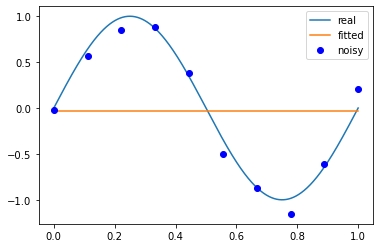

In [26]:
p_lsp_0 = fit(0)

Fitting Parameter [-1.2176792   0.58151153]


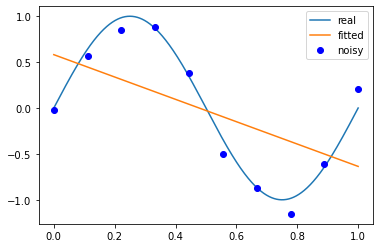

In [27]:
p_lsp_1 = fit(1)

Fitting Parameter [ 0.56417114 -1.78185034  0.66509244]


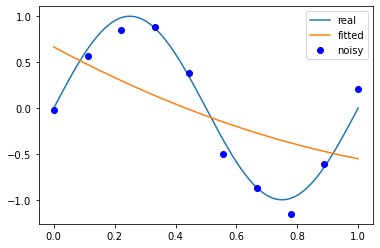

In [28]:
p_lsp_2 = fit(2)

Fitting Parameter [-2.68588325e+04  1.16915376e+05 -2.12403209e+05  2.08824660e+05
 -1.20483184e+05  4.13975638e+04 -8.19974957e+03  8.35491508e+02
 -2.78834097e+01 -1.94575981e-02]


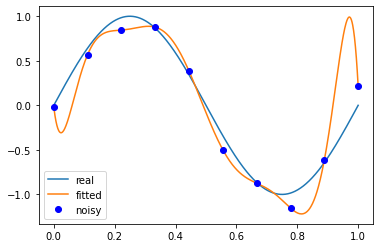

In [32]:
p_lsp_9 = fit(9)

# 正则化
模型选择的典型方法是我们的正则化, 在正则化中, 我们具有两项, 一项是我们的经验风险, 一项是我们的正则化项,$\lambda $ 是调整两者之间关系的系数
得到的公式为$L(w) = \frac{1}{N}\sum_{i=1}^N (f(x_i;w) - y_i)^2) + \frac{\lambda}{2}||w||^2$

In [20]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_f(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [33]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

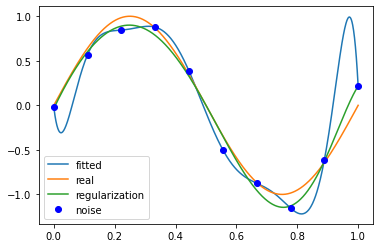

In [45]:
p_init = np.random.rand(9+1)
p_lsp = leastsq(residual,p_init,args=(x,y))
plt.plot(x_point, fit_f(p_lsp[0], x_point),label = "fitted")
plt.plot(x_point, rel_f(x_point), label='real')
plt.plot(
    x_point,
    fit_f(p_lsq_regularization[0], x_point),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()